In [6]:
import fitsio
import proplot as pplt
import numpy as np

In [17]:
dall = fitsio.read("psf_stats.fits", lower=True)
dall.dtype.names

('expnum',
 'ccdnum',
 'tag',
 'filename',
 'flag',
 'fwhm_cen',
 'star_t_std',
 'star_t_mean',
 'nstar',
 'exp_star_t_mean',
 'exp_star_t_std')

In [18]:
d = dall[(dall["flag"] == 0) & (d["nstar"] >= 30)]

exposure cut: 201
star T cut: 840


Text(0.5, 1.0, 'cut: 84000.000%')

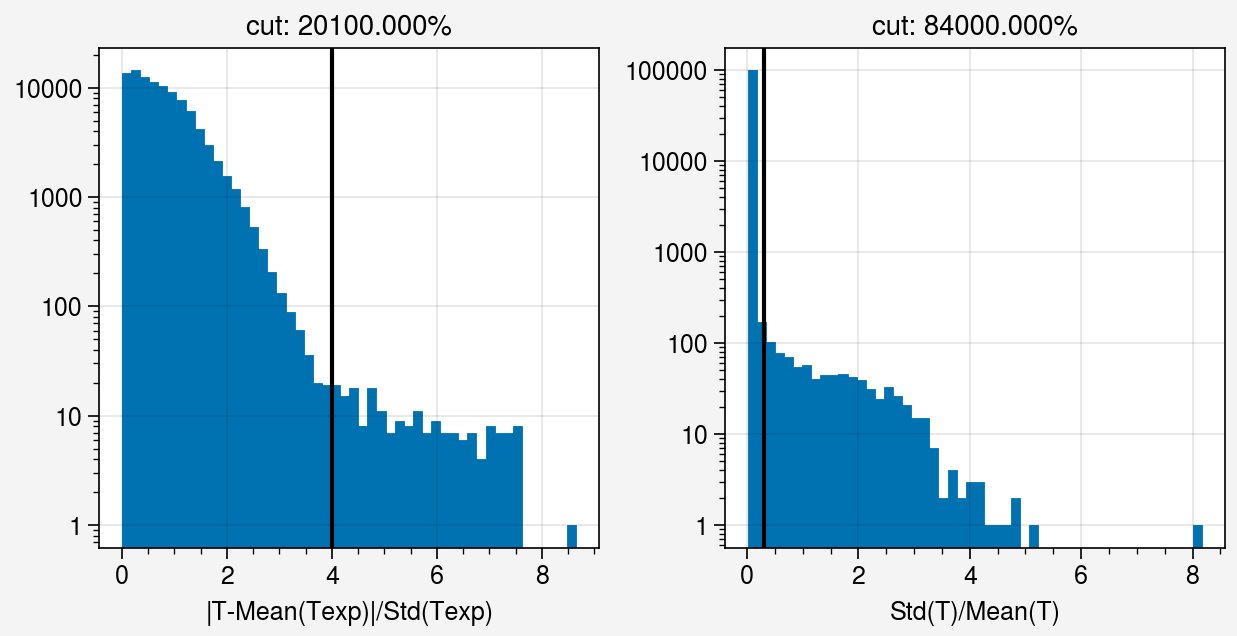

In [25]:
fig, axs = pplt.subplots(nrows=1, ncols=2, share=0)

ax = axs[0]
ax.hist(
    np.abs(d["star_t_mean"] - d["exp_star_t_mean"])/d["exp_star_t_std"],
    bins=50,
    log=True
);
ax.set_xlabel("|T-Mean(Texp)|/Std(Texp)")
ax.axvline(4, color="k")
frac = np.mean(np.abs(d["star_t_mean"] - d["exp_star_t_mean"])/d["exp_star_t_std"] > 4)
print("exposure cut:", frac)
ax.set_title("cut: %0.3f%%" % (frac*100))

# ax = axs[1]
# ax.hist(
#     d["nstar"],
#     bins=50,
#     log=True
# );
# print("nstar cut:", np.mean(d["nstar"] < 30))

ax = axs[1]
ax.hist(
    d["star_t_std"]/d["star_t_mean"],
    bins=50,
    log=True
);
frac = np.mean(d["star_t_std"]/d["star_t_mean"] >= 0.3)
print("star T cut:", frac)
ax.set_xlabel("Std(T)/Mean(T)")
ax.axvline(0.3, color="k")
ax.set_title("cut: %0.3f%%" % (frac*100))